# UBC Scientific Software Seminar

## August 3, 2016

Today's Agenda:

1. Bash
    * Review: Bash commands
    * More Bash commands
    * Exercise: Scraping the web
2. Python: logic, loops and functions
3. A quick intro to NumPy and matplotlib 

### 1. Bash

We can execute Bash commands in at least 3 ways:

1. Enter Bash commands in the terminal
2. Enter Bash commands (beginning with a bang character `!`) in a code cell in a Jupyter notebook
3. Write several lines of Bash commands in a text file with extension `.sh` and call it from the terminal:

```bash
bash my_script.sh
```

### 1.1 Review: Bash commands

Recall, we have already used several simple Bash commands:

#### Interacting with the file system
* `pwd`
* `ls`
* `cd`

#### Creating/removing files and directories
* `mkdir`
* `rm`
* `mv`

#### Viewing contents of a file

* `less`
* `cat`
* `head`
* `tail`
* `wc`
* `sort`

In [2]:
! head -3 ../README.md

## UBC Scientific Software Seminar

The UBC Scientific Software Seminar is inspired by [Software Carpentry](http://software-carpentry.org/) and its goal is to help students, graduates, fellows and faculty at UBC develop software skills for science.


In [3]:
! wc -l ../README.md

      62 ../README.md


Note that `..` is a reference to the directory above the current working directory.

#### Pipes, redirections and wildcards

We also saw how to use the output of one command as the input into another using the pipe character `|`, and how to redirect output to a file using the character `>`.

### 1.2 More Bash commands

Today, we'll look at more advanced commmands such as:

* `curl`
* `grep`
* `find`
* `cut`
* `rev`
* `date`
* `sleep`

See the [Bash cheat sheet](http://cli.learncodethehardway.org/bash_cheat_sheet.pdf) for details regarding these commands.

#### curl

The command `curl` fetches a file from a given url and prints the result to standard output.

For example, we can fetch the [collected works of Shakespeare](http://www.gutenberg.org/cache/epub/100/pg100.txt) and redirect the output to a file named `shakespeare.txt`:

In [4]:
! curl http://www.gutenberg.org/cache/epub/100/pg100.txt > shakespeare.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5458k  100 5458k    0     0  2045k      0  0:00:02  0:00:02 --:--:-- 2044k


In [5]:
# Look at the first 20 lines of the file
! head -20 shakespeare.txt

In [6]:
# Count the number of lines in the file
! wc -l shakespeare.txt

  124787 shakespeare.txt


#### grep

The command `grep` looks in a file for the occurence of a pattern of characters specified by a [regular expression](https://en.wikipedia.org/wiki/Regular_expression). We won't go into regular expressions today and so we'll restrict our searches to words and phrases.

For example, let's count the number of times the word "love" appears in Shakespeare's works (ignoring case):

In [7]:
# Count the number of occurences of "love"
# The flag -i ignores case and so looks for "love", "Love", "LOVE", etc.
! grep -i love shakespeare.txt | wc -l

    2653


We can also look for phrases:

In [8]:
! grep "wherefore art thou" shakespeare.txt

In [9]:
# The flags -B and -A show lines occuring before and after the search text
! grep -B 2 -A 4 "grave man" shakespeare.txt

In [10]:
! rm shakespeare.txt

### 1.3 Exercise: Scraping the web

Write a Bash script which fetches the headlines from several different RSS feeds from cbc.ca (see [cbc.ca/rss/](http://www.cbc.ca/rss/)) and saves them to a text file with a time stamp. Go even further and write the script so that it fetches headlines every 15 minutes.

As a first step, let's get an XML file from [cbc.ca](http://www.cbc.ca) and take a look at it:

In [11]:
! curl http://www.cbc.ca/cmlink/rss-topstories > topstories-raw.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18540  100 18540    0     0   908k      0 --:--:-- --:--:-- --:--:--  952k


In [12]:
! head -30 topstories-raw.txt

<?xml version="1.0" encoding="UTF-8"?>
<rss xmlns:cbc="http://www.cbc.ca/rss/cbc" version="2.0">
  <channel>
    <title><![CDATA[CBC | Top Stories News ]]></title>
    <link>http://www.cbc.ca/news/?cmp=rss</link>
    <description>
      <![CDATA[
      FOR PERSONAL USE ONLY
      ]]>
    </description>
    <language>en-ca</language>
    <lastBuildDate>Wed, 3 Aug 2016 17:33:15 EDT</lastBuildDate>
    <copyright><![CDATA[Copyright: (C) Canadian Broadcasting Corporation, http://www.cbc.ca/aboutcbc/discover/termsofuse.html#Rss]]></copyright>
        <docs><![CDATA[http://www.cbc.ca/rss/]]></docs>
    <image>
      <title>CBC.ca</title>
      <url>http://www.cbc.ca/rss/image/cbc_144.gif</url>
      <link>http://www.cbc.ca/news/?cmp=rss</link>
    </image>
    <item cbc:type="story" cbc:deptid="2.655" cbc:syndicate="true">
      <title><![CDATA[Hunter Tootoo apologizes for 'consensual but inappropriate relationship']]></title>
            <link>http://www.cbc.ca/news/canada/north/hunter-toot

We can see that the headlines are contained in `<title>` tags and so we can use `grep` to find these lines. Notice that the characters `<` and `>` are special characters in Bash and so we need to use the escape character `\`.

In [13]:
! grep \<title\> topstories-raw.txt

    <title><![CDATA[CBC | Top Stories News ]]></title>
      <title>CBC.ca</title>
      <title><![CDATA[Hunter Tootoo apologizes for 'consensual but inappropriate relationship']]></title>
      <title><![CDATA[Canadian women's soccer team wins Olympic opener over Australia]]></title>
      <title><![CDATA[Mike Pence's endorsement of Paul Ryan is a break with Trump]]></title>
      <title><![CDATA[Meet the 5 commissioners overseeing the inquiry into missing, murdered Indigenous women]]></title>
      <title><![CDATA[Man charged with uttering threats against Prime Minister Justin Trudeau on Facebook]]></title>
      <title><![CDATA[Donald Trump in Florida LIVE at 7 p.m. ET]]></title>
      <title><![CDATA[Student sues college after work placement beating left her blind in 1 eye]]></title>
      <title><![CDATA[Spirits of missing, murdered Indigenous women 'close in our hearts,' says First Nations judge leading inquiry]]></title>
      <title><![CDATA[U.S. buyer says abandoning deal on V

The lines which contain headlines have 22 characters at the beginning of each line which we would like to cut out. We can use the `cut` command to accomplish this task. (See the Bash cheat sheet or Google `bash cut` for help.)

In [14]:
! grep \<title\> topstories-raw.txt | cut -c 23-

C | Top Stories News ]]></title>
itle>
Hunter Tootoo apologizes for 'consensual but inappropriate relationship']]></title>
Canadian women's soccer team wins Olympic opener over Australia]]></title>
Mike Pence's endorsement of Paul Ryan is a break with Trump]]></title>
Meet the 5 commissioners overseeing the inquiry into missing, murdered Indigenous women]]></title>
Man charged with uttering threats against Prime Minister Justin Trudeau on Facebook]]></title>
Donald Trump in Florida LIVE at 7 p.m. ET]]></title>
Student sues college after work placement beating left her blind in 1 eye]]></title>
Spirits of missing, murdered Indigenous women 'close in our hearts,' says First Nations judge leading inquiry]]></title>
U.S. buyer says abandoning deal on Vancouver home likely cheaper than foreign-buyer tax]]></title>
'This is a shame!' Filthy waters raise ire ahead of Rio Olympics ]]></title>
Obama shortens 214 prison sentences — including dozens of life terms]]></title>
Rowing Canada's 'death

Now there are 11 characters at the end of each line we would like to eliminate. We can use the command `rev` to reverse the order of each line and then use `cut` to remove these characters.

In [15]:
! grep \<title\> topstories-raw.txt | cut -c 23- | rev | cut -c 12- | rev

C | Top Stories News 

Hunter Tootoo apologizes for 'consensual but inappropriate relationship'
Canadian women's soccer team wins Olympic opener over Australia
Mike Pence's endorsement of Paul Ryan is a break with Trump
Meet the 5 commissioners overseeing the inquiry into missing, murdered Indigenous women
Man charged with uttering threats against Prime Minister Justin Trudeau on Facebook
Donald Trump in Florida LIVE at 7 p.m. ET
Student sues college after work placement beating left her blind in 1 eye
Spirits of missing, murdered Indigenous women 'close in our hearts,' says First Nations judge leading inquiry
U.S. buyer says abandoning deal on Vancouver home likely cheaper than foreign-buyer tax
'This is a shame!' Filthy waters raise ire ahead of Rio Olympics 
Obama shortens 214 prison sentences — including dozens of life terms
Rowing Canada's 'death machine' grooms champions
Humans didn't kill off these mammoths, but scientists know what did
Washington transit officer allegedly caugh

Finally, we want to eliminate the first two lines and then write the result to a file named `topstories.txt`. We can use the command `tail` to select all but the first two lines.

In [16]:
! grep \<title\> topstories-raw.txt | cut -c 23- | rev | cut -c 12- | rev | tail -n +3 > topstories.txt
! rm topstories-raw.txt
! cat topstories.txt

Hunter Tootoo apologizes for 'consensual but inappropriate relationship'
Canadian women's soccer team wins Olympic opener over Australia
Mike Pence's endorsement of Paul Ryan is a break with Trump
Meet the 5 commissioners overseeing the inquiry into missing, murdered Indigenous women
Man charged with uttering threats against Prime Minister Justin Trudeau on Facebook
Donald Trump in Florida LIVE at 7 p.m. ET
Student sues college after work placement beating left her blind in 1 eye
Spirits of missing, murdered Indigenous women 'close in our hearts,' says First Nations judge leading inquiry
U.S. buyer says abandoning deal on Vancouver home likely cheaper than foreign-buyer tax
'This is a shame!' Filthy waters raise ire ahead of Rio Olympics 
Obama shortens 214 prison sentences — including dozens of life terms
Rowing Canada's 'death machine' grooms champions
Humans didn't kill off these mammoths, but scientists know what did
Washington transit officer allegedly caught funding ISIS
Private 

In [17]:
# Now that we have things working, let's remove the file
! rm topstories.txt

Finally, let's assemble these commands into a textfile named `get-headlines.sh` and wrap the commands in a for loop to fetch headlines from several different RSS feeds: topstories, canada, politics, offbeat, sports-nba and canada-britishcolumbia. Notice that we use the character `$` to access the value of the variable `subject` in the for loop.

```bash
# get-headlines.sh

for subject in topstories canada politics offbeat sports-nba canada-britishcolumbia
do
curl http://www.cbc.ca/cmlink/rss-$subject > $subject-raw.txt
grep \<title\> $subject-raw.txt | cut -c 23- | rev | cut -c 12- | rev | tail -n +3 > $subject.txt
rm $subject-raw.txt
done
```

In [18]:
! bash get-headlines.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18540  100 18540    0     0   713k      0 --:--:-- --:--:-- --:--:--  724k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17945  100 17945    0     0   978k      0 --:--:-- --:--:-- --:--:-- 1030k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19269  100 19269    0     0   634k      0 --:--:-- --:--:-- --:--:--  648k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17699  100 17699    0     0   764k      0 --:--:-- --:--:-- --:--:--  785k
  % Total    % Received % Xferd  Average Speed   Tim

In [19]:
! ls

2016-08-03-notes.ipynb     offbeat.txt
canada-britishcolumbia.txt politics.txt
canada.txt                 sports-nba.txt
get-headlines-repeat.sh    topstories.txt
get-headlines.sh


In [20]:
! cat offbeat.txt

Edmonton man shot in the neck with arrow on America's Got Talent 
Real-life Pokemon: Pikachu statue mysteriously pops up in New Orleans
Calgary company makes more money from not drilling than drilling
The cat came back — 19 months and several snowstorms later
Stolen gnome returned to B.C. woman after 8 months with photos of international adventure
'Trump Bump' in Cape Breton draws tourists, but few new residents
Snakes force Ontario city to stop cutting grass at public park
Ontario town hit by rash of female mannequin thefts 
British badgers terrified by CBC programming, study suggests
Massive N.B. moth infestation coating cars and parking lots
Shawshank Redemption oak tree knocked down
Pelican vs turtle fight captured on Ontario lake
Boater battles badger on B.C. lake
Death Road to Canada an indie game take on The Walking Dead, with Mounties and Elvis
Notable bobbleheads, from Pope Francis to Donald Trump


In [21]:
! cat canada.txt

Hunter Tootoo apologizes for 'consensual but inappropriate relationship'
Canadian women's soccer team wins Olympic opener over Australia
Marion Buller, B.C. First Nations judge, to lead MMIW inquiry
Feds apologize after contractor knocks out internet in Yukon, Nunavut
'It's going to be our ice bucket moment': Brain cancer research could benefit big from Tragically Hip concerts
Bold wolf forces 200 campers to relocate tents in Banff National Park
Irving Oil deal to buy Ireland's only refinery 'very welcome indeed,' says MP
Student sues college after work placement beating left her blind in 1 eye
Correctional officer takes stress leave due to Phoenix pay issues
Sask. government doing its own testing of Husky water results
Teen couple shot to death on Alberta First Nation to be buried side by side
PM Trudeau to join royals on Yukon visit next month
P.K. Subban's letter read by Montreal Children's Hospital patients, bringing some to tears
Trudeau sightings in Tofino B.C. set off waves of T

In [22]:
# Remove the text files created by get-headlines.sh
! rm *.txt

#### Scraping the web repeatedly with logging

Taking this example further, we can add some code so that our Bash script get headlines every 15 minutes and writes the headlines with names including the date and time. The result is the following:

```bash
# get-headlines-repeat.sh

while true
do

  for subject in topstories canada politics offbeat sports-nba canada-britishcolumbia
  do

    # Get the current datetime in the given format
    now=$(date +"%Y-%m-%d-%H-%M")
    
    curl http://www.cbc.ca/cmlink/rss-$subject > $subject-raw.txt
    
    grep \<title\> $subject-raw.txt | cut -c 23- | rev | cut -c 12- | rev | tail -n +3 > $subject-$now.txt
    
    rm $subject-raw.txt
    
  done
  
  echo "Retrieved data at $now ..."
  sleep 900 # Sleep for 900 seconds = 15 minutes

done
```

In [23]:
# UNCOMMENT THE NEXT LINE TO EXECUTE get-headlines-repeat.sh
# ! bash get-headlines-repeat.sh

### 2. Python: logic, loops and functions

The following is a quick tour of some parts of the standard Python library intended only as an introduction to Python syntax.

#### Comparison operators

* `==` (equal)
* `!=` (not equal)
* `<` (less than)
* `<=` (less than or equal to)
* `>` (greater than)
* `>=` (greater than or equal to)

In [24]:
1 < 2

True

In [25]:
"Patrick" != "patrick"

True

In [26]:
100 >= 101

False

#### Boolean operators

* `and`
* `or`
* `not`
* `in`

In [27]:
1 < 2 and 1 < 3

True

In [28]:
5 % 2 == 2 or 2 + 4 == 2

False

In [29]:
'a' in 'aeiou'

True

In [30]:
1 not in ['1','2','3']

True

#### Functions

Syntax to define a function:

```python
def fun(x):
    return x**2
```

In [31]:
def fun(x):
    square = x**2
    return square

In [32]:
fun(2)

4

In [33]:
fun(-1.234)

1.522756

#### `if` statement

Syntax to define `if` statement:

```python
if logical_expression_1:
    # Python code block 1
    # indented statndard 4 spaces
elif logical_expression_2:
    # Python code block 2
    # indented statndard 4 spaces
else:
    # Python code block 3
    # indented statndard 4 spaces
```

In [34]:
if 1 < 2:
    print('Duh!')
else:
    print("What?")

Duh!


### Exercise 2.1: Roots of quadratics

Write a function which takes parameters a, b, and c and determines whether the polynomial $ax^2 + bx + c$ has real distinct roots, complex roots or one real repeated root.

In [35]:
def roots(a,b,c):
    discriminant = b**2 - 4*a*c
    print("p(x) = {0}x^2 + {1}x + {2}".format(a,b,c))
    if discriminant > 0:
        print("Roots are real and distinct.")
    elif discriminant < 0:
        print("Roots are complex.")
    else:
        print("One repeated real root.")

In [36]:
roots(1,0,1)

p(x) = 1x^2 + 0x + 1
Roots are complex.


In [37]:
roots(1,0,-1)

p(x) = 1x^2 + 0x + -1
Roots are real and distinct.


In [38]:
roots(1,2,1)

p(x) = 1x^2 + 2x + 1
One repeated real root.


#### `for` loop

Syntax to write a `for` loop:

```python
for variable in iterable_object:
    # Python code block
    # indented standard 4 spaces
```

Examples of iterable objects:

* lists
* strings
* an object returned by a generator function such as `range`

In [39]:
noises = ["biz","bam","boom","pow"]
for noise in noises:
    noise = noise.upper() # string method .upper() returns the string in uppercase
    print(noise + "!")

BIZ!
BAM!
BOOM!
POW!


In [40]:
my_name = "Patrick"
for letter in my_name:
    print("Give me a",letter + "!")

Give me a P!
Give me a a!
Give me a t!
Give me a r!
Give me a i!
Give me a c!
Give me a k!


In [41]:
for n in range(0,10):
    n_squared = n**2
    print(n, "squared is equal to", n_squared)

0 squared is equal to 0
1 squared is equal to 1
2 squared is equal to 4
3 squared is equal to 9
4 squared is equal to 16
5 squared is equal to 25
6 squared is equal to 36
7 squared is equal to 49
8 squared is equal to 64
9 squared is equal to 81


In [42]:
for n in [0,1,2,3,4,5,6,7,8,9]:
    n_squared = n**2
    print(n, "squared is equal to", n_squared)

0 squared is equal to 0
1 squared is equal to 1
2 squared is equal to 4
3 squared is equal to 9
4 squared is equal to 16
5 squared is equal to 25
6 squared is equal to 36
7 squared is equal to 49
8 squared is equal to 64
9 squared is equal to 81


### Exercise 2.2: Partial sums of series

Write a function which takes parameters $x$ and $N$ and returns the $Nth$ partial sum of the Taylor series of $\log x$:

$$
\sum_{n=1}^N (-1)^{n+1} \frac{(x-1)^n}{n}
$$

In [43]:
def log_partial_sum(x,N):
    result = 0
    for n in range(1,N+1):
        result = result + (-1)**(n+1) * (x-1)**n / n
    return result

In [44]:
# Check log(1) = 0
log_partial_sum(1,1)

0.0

In [45]:
# Check log(1/e) = -1
log_partial_sum(1/2.7182818284590451,50)

-0.9999999999964204

### 3. NumPy and matplotlib

Python is a general purpose scripting language and can be used to solve a wide variety of problems. Python packages are modules of Python scripts designed for a specific problem and the [Python Package Index (PyPI)](https://pypi.python.org/pypi) currently hosts over 85,000 open source packages!

There are Python packages for just about everything: server-side web applications, symbolic mathematical computation, image processing, interactive web-based data visualization, et cetera.

We will focus on the SciPy stack: [NumPy](http://www.numpy.org/), [SciPy](http://scipy.org/), [matplotlib](http://matplotlib.org/) and [pandas](http://pandas.pydata.org/). These Python packages form the basis of scientific computing in Python.

NumPy is built for fast array computations. We'll explore the package further in the coming weeks but for now let's simply create some NumPy arrays. The first step with any package is to import it:

In [46]:
import numpy as np

We access functions and objects in the NumPy package using the dot notation `np.______` (and so the abbreviated name `np` is a convention which simplifies each call to the package).

In [47]:
np.linspace(0,1,11)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

We can view the documentation in our Jupyter notebook using a question mark such as:

In [48]:
np.linspace?

All the usual mathematical functions are included in NumPy and are vectorized: they accept arrays as arguments and apply functions elementwise.

In [49]:
x = np.linspace(0,1,11)
y = np.exp(x)
print(x)
print(y)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[ 1.          1.10517092  1.22140276  1.34985881  1.4918247   1.64872127
  1.8221188   2.01375271  2.22554093  2.45960311  2.71828183]


matplotlib is a plotting library which is very similar to Matlab's plotting library. Let's import it with the statndard naming convention:

In [50]:
import matplotlib.pyplot as plt

We need a bit of [magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html). The following tells the Jupyter notebook to output matplotlib figures *inline*.

In [51]:
%matplotlib inline

Now plotting is as simple as:

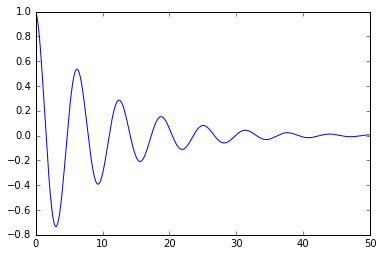

In [52]:
x = np.linspace(0,50,1000)
y = np.exp(-0.1*x) * np.cos(x)
plt.plot(x,y)

### Exercise 3.1: Plotting mathematical functions

1. Plot the function $f(x) = 1 - x^2$ for $x \in [-2,2]$.
2. Plot the function $f(x) = \arctan x$ for $x \in [-5,5]$.
3. Plot the parametic curve $x(t) = \cos 3t$, $y(t) = \sin 2t$ for $t \in [0,2 \pi]$.